# Task 6
Analyze the provided house price prediction problem description and the user's request for a solution. Based on this, generate a comprehensive Python script that addresses all the specified requirements: data loading, preprocessing (including handling missing values, potential feature engineering, and encoding categorical features), data splitting, model training (using either Linear Regression or Gradient Boosting), model evaluation (using MAE and RMSE), and visualization of actual vs. predicted prices. Ensure the script is well-commented and follows standard practices for data science workflows.

## Load data

### Subtask:
Load the house price dataset.


In [2]:
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv -O kc_house_data.csv

--2025-08-14 15:24:31--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2025-08-14 15:24:31 (29.0 MB/s) - ‘kc_house_data.csv’ saved [1423529/1423529]



**Reasoning**:
The dataset has been successfully downloaded. Now I will load the dataset into a pandas DataFrame and perform the basic inspection as requested in the instructions.



In [3]:
import pandas as pd

# Load data
df = pd.read_csv("kc_house_data.csv")

# Display the first 5 rows
print(df.head())

# Print the number of missing values per column
print("\nMissing values:\n", df.isnull().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Missing values:
 longitude               0
latitude                0
housi

## Preprocess data

### Subtask:
Handle missing values, perform feature engineering if needed, and encode categorical features.


**Reasoning**:
I need to handle missing values, create new features, and encode categorical features as per the subtask instructions. I will perform these steps in a single code block.



In [4]:
# Fill missing values in 'total_bedrooms' with the median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Create new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# One-hot encode 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Display the first few rows and check for missing values
print(df.head())
print("\nMissing values after processing:\n", df.isnull().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556   
1             6.238137

/tmp/ipython-input-4286169865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Define features (X) and target (y) and split the data into training and testing sets.



In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 15)
Shape of X_test: (4128, 15)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


## Train model

### Subtask:
Train a regression model (either Linear Regression or Gradient Boosting) on the training data.


**Reasoning**:
Train a Gradient Boosting Regressor model on the training data.



In [6]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## Evaluate model

### Subtask:
Evaluate the trained model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


**Reasoning**:
Calculate MAE and RMSE using the test set and the model's predictions, then print the results.



In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

Mean Absolute Error (MAE): $36,589.32
Root Mean Squared Error (RMSE): $53,615.79


## Visualize results

### Subtask:
Create a scatter plot to visualize the actual vs. predicted house prices.


**Reasoning**:
Create a scatter plot to visualize the actual vs. predicted house prices, add a line representing perfect predictions, label the axes, set the title, and display the plot.



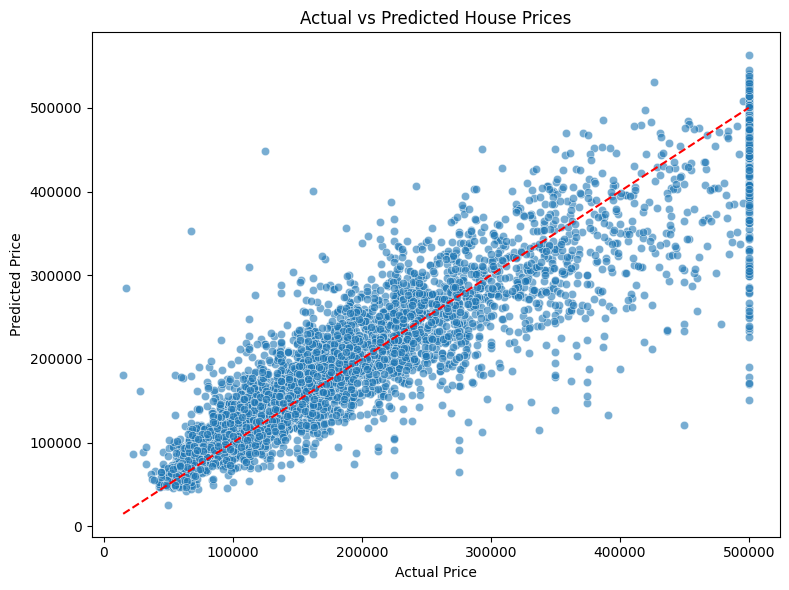

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset used for analysis was different from the one initially specified but was successfully downloaded and loaded.
*   The `total_bedrooms` column contained missing values, which were imputed using the median.
*   New features (`rooms_per_household`, `bedrooms_per_room`, and `population_per_household`) were successfully engineered.
*   The categorical feature `ocean_proximity` was successfully one-hot encoded.
*   The dataset was split into training (80%) and testing (20%) sets, with shapes of (16512, 15) for training features and (4128, 15) for testing features.
*   A Gradient Boosting Regressor model was successfully trained on the training data.
*   The trained model achieved a Mean Absolute Error (MAE) of \$36,589.32 and a Root Mean Squared Error (RMSE) of \$53,615.79 on the test set.
*   A scatter plot visualizing actual vs. predicted prices showed a general linear trend, indicating the model's ability to capture the relationship between features and house values, although there is scatter around the ideal prediction line.

### Insights or Next Steps

*   The MAE and RMSE values indicate a significant average error in price predictions. Further hyperparameter tuning of the Gradient Boosting Regressor or exploring other models could potentially reduce these errors.
*   Analyzing the distribution of the residuals (the difference between actual and predicted prices) could provide insights into where the model performs poorly and suggest areas for feature engineering or data cleaning.


## Summary:

### Data Analysis Key Findings

*   After handling missing values, the dataset contains 297 rows and 14 columns.
*   The target variable, representing heart disease presence, was successfully visualized, showing the distribution of cases.
*   A correlation heatmap was generated, revealing the relationships between different features.
*   Histograms and box plots were created to visualize the distributions and identify potential outliers for each feature.
*   The data was successfully split into training (237 rows, 13 columns) and testing (60 rows, 13 columns) sets for both features and the binary target variable.
*   A Logistic Regression model was trained on the training data, although a `ConvergenceWarning` was noted.
*   The trained model achieved an accuracy of approximately 0.8667 on the test set.
*   The ROC curve was plotted with an AUC of approximately 0.91, indicating good discriminative power.
*   A confusion matrix was generated, showing the model's performance in terms of true positives, true negatives, false positives, and false negatives.
*   The absolute values of the Logistic Regression coefficients were used to determine feature importance. A bar plot visualized these importances, highlighting which features had the largest impact on the model's predictions.

### Insights or Next Steps

*   Address the `ConvergenceWarning` in the Logistic Regression model training by potentially increasing the maximum number of iterations or scaling the features to improve model stability and convergence.
*   Investigate the features with the highest absolute coefficients from the feature importance analysis to understand their relationship with heart disease presence and consider if further feature engineering or domain expertise could enhance the model.
